In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
import glob
import cv2
from keras.preprocessing.image import ImageDataGenerator
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 10.0) 
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

/Users/YINAN/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
sealion_classes_dic = {
    'adult_males': 0, 
    'subadult_males': 0, 
    'adult_females': 0, 
    'juveniles': 0, 
    'pups': 0, 
    'backgrounds': 0
}
path = '/Users/YINAN/Local/Sealions/Data/Patches/train/'
for key in sealion_classes_dic.keys():
    dirs = glob.glob(path + key + '/*.jpg')
    sealion_classes_dic[key] = len(dirs)
print(sealion_classes_dic)

{'adult_males': 3332, 'subadult_males': 5314, 'adult_females': 22237, 'juveniles': 12179, 'pups': 9686, 'backgrounds': 120000}


Text(0.5,1,'Train Data Distribution')

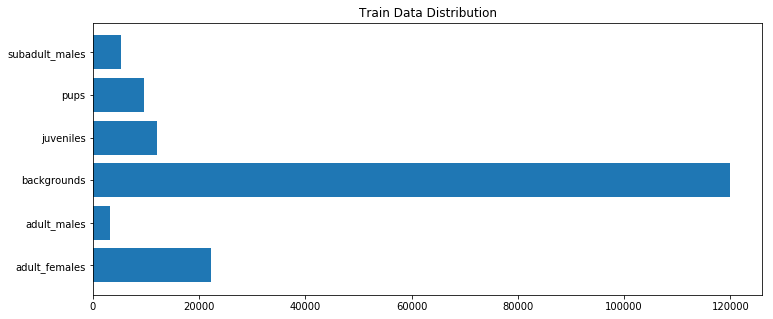

In [76]:
plt.figure(figsize=(12,5))
plt.barh(list(sealion_classes_dic.keys()), list(sealion_classes_dic.values()))
plt.title('Train Data Distribution')

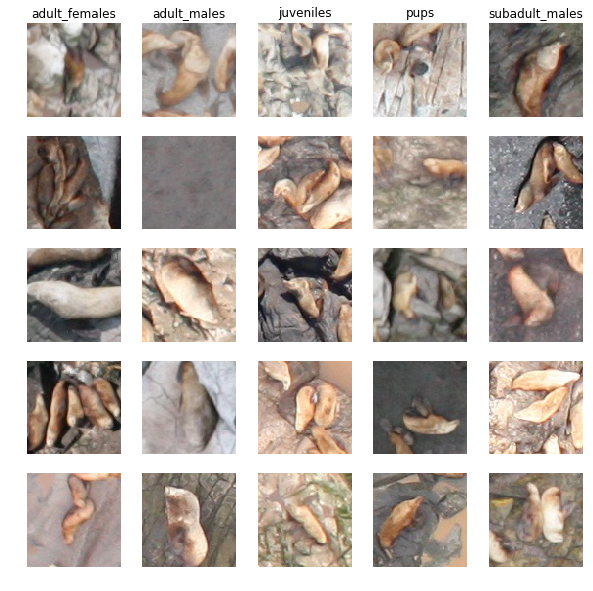

In [77]:
# visualize some patches from dataset
for i, _class in enumerate(sum_info.index.tolist()):
    path = '/Users/YINAN/Local/Sealions/Data/Patches/train/' + _class
    img_dirs = glob.glob(path+'/*.jpg')
    img_dirs = np.random.choice(img_dirs, 5, replace=False)
    for j, img_dir in enumerate(img_dirs):
        img = cv2.cvtColor(cv2.imread(img_dir), cv2.COLOR_BGR2RGB)
        plt_idx = j*5 + i + 1
        plt.subplot(5, 5, plt_idx)
        plt.imshow(img)
        plt.axis('off')
        if j == 0:
            plt.title(_class)

plt.show()

# Model Evaluation

Our model scores:  
loss 0.52 
acc 0.83  
VGG16 model scores:  
loss 0.35 
acc 0.89

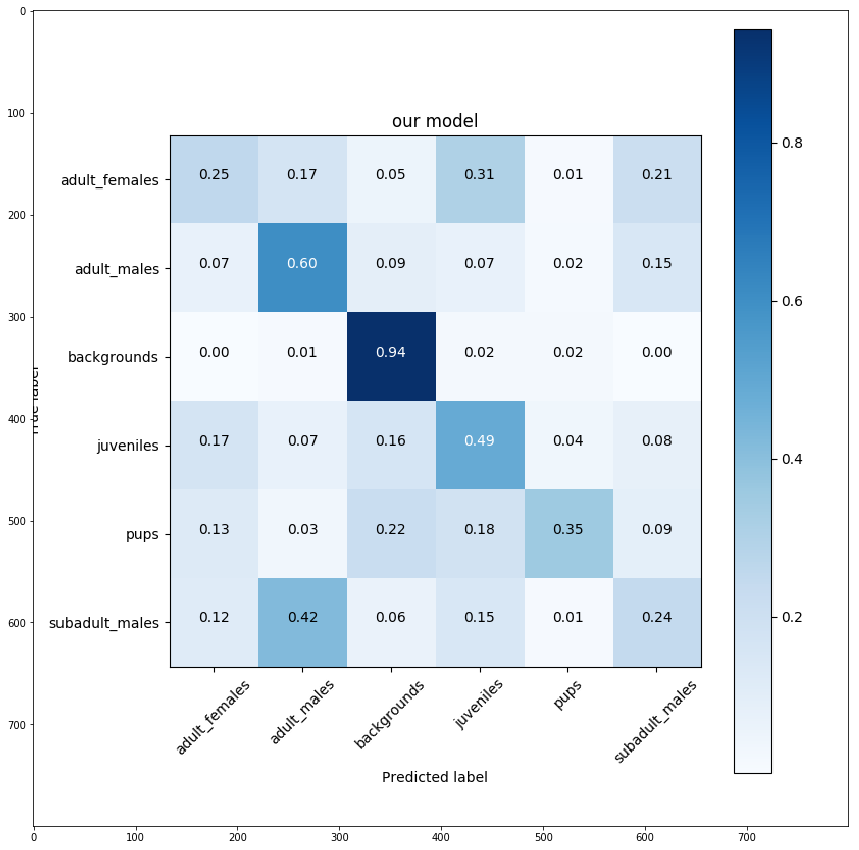

In [217]:
plt.figure(figsize=(15,15))
cm = plt.imread('/Users/YINAN/Documents/Code/Pycharm/Sealion/saved/pic/our_model_cm.png')
plt.imshow(cm)

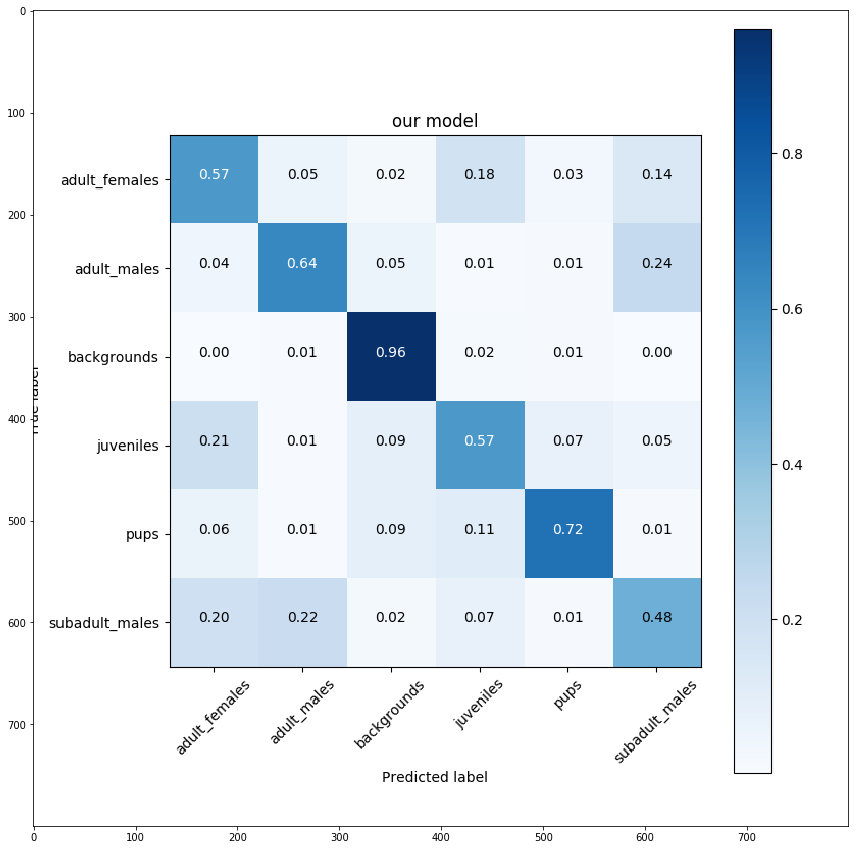

In [86]:
plt.figure(figsize=(15,15))
cm = plt.imread('/Users/YINAN/Documents/Code/Pycharm/Sealion/saved/pic/vgg_model_cm.png')
plt.imshow(cm)

# Check wrong predictions

{'adult_males': 1078, 'subadult_males': 677, 'adult_females': 7880, 'juveniles': 4061, 'pups': 3970, 'backgrounds': 80000}


Text(0.5,1,'Test Data Distribution')

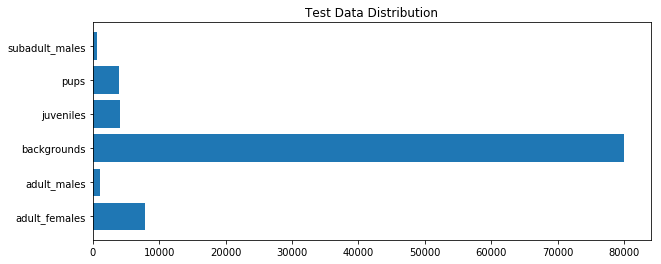

In [261]:
sealion_classes_dic = {
    'adult_males': 0, 
    'subadult_males': 0, 
    'adult_females': 0, 
    'juveniles': 0, 
    'pups': 0, 
    'backgrounds': 0
}
path = '/Users/YINAN/Local/Sealions/Data/Patches/test/'
for key in sealion_classes_dic.keys():
    dirs = glob.glob(path + key + '/*.jpg')
    sealion_classes_dic[key] = len(dirs)
print(sealion_classes_dic)

plt.figure(figsize=(10,4))
plt.barh(list(sealion_classes_dic.keys()), list(sealion_classes_dic.values()))
plt.title('Test Data Distribution')

# Our Model

In [5]:
our_model = keras.models.load_model('/Users/YINAN/Documents/Code/Pycharm/Sealion/saved/our_model/best_checkpoint.hdf5')
our_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 92, 92, 8)         608       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 46, 46, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 44, 44, 5)         365       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 5)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 20, 20, 5)         230       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 10, 10, 5)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 10)          460       
__________

In [143]:
test_datagen = ImageDataGenerator(
        rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        '/Users/YINAN/Local/Sealions/Data/Patches/test/',
        target_size=(96, 96),
        batch_size=1,
        shuffle=False)

Found 97666 images belonging to 6 classes.


In [144]:
wrong_preds = []
print('total {}'.format(len(test_generator)))
for i, (X, y) in enumerate(test_generator):
    if i == len(test_generator):
        break
    preds = our_model.predict(X)[0]
    if preds.argmax() != y[0].argmax():
        wrong_preds.append((X[0], preds, y[0].argmax()))
    print('\r%d completes.., wrong %d' % (i+1, len(wrong_preds)), end='')

total 97666
97666 completes.., wrong 15412

{'adult_males': 469, 'subadult_males': 421, 'adult_females': 4550, 'juveniles': 1427, 'pups': 1370, 'backgrounds': 7175}


Text(0.5,1,'Wrong Predictions')

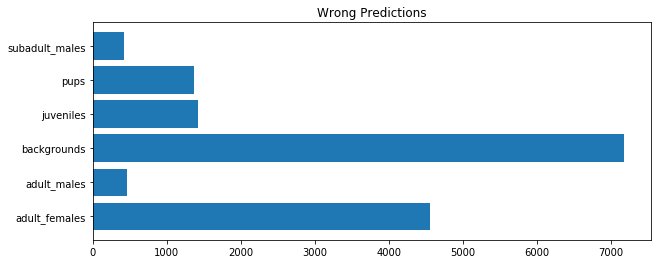

In [218]:
sealion_classes_wrong_num = {
    'adult_males': 0, 
    'subadult_males': 0, 
    'adult_females': 0, 
    'juveniles': 0, 
    'pups': 0, 
    'backgrounds': 0
}
class_names = ['adult_females','adult_males','backgrounds','juveniles','pups','subadult_males']
for i in range(len(wrong_preds)):
    sealion_classes_wrong_num[class_names[wrong_preds[i][-1]]] += 1
print(sealion_classes_wrong_num)

plt.figure(figsize=(10,4))
plt.barh(list(sealion_classes_wrong_num.keys()), list(sealion_classes_wrong_num.values()))
plt.title('Wrong Predictions')

In [5]:
def draw_wrong_pred_distribution(class_name, wrong_preds, class_names):
    temp = {
        'adult_males': 0, 
        'subadult_males': 0, 
        'adult_females': 0, 
        'juveniles': 0, 
        'pups': 0, 
        'backgrounds': 0}
    class_idx = class_names.index(class_name)
    for i in range(len(wrong_preds)):
        if wrong_preds[i][-1] == class_idx:
            _class = class_names[wrong_preds[i][1].argmax()]
            temp[_class] += 1
            
    plt.figure(figsize=(10,4))
    plt.barh(class_names, [temp[x] for x in class_names])
    plt.title('True {} , wrong pred distribution'.format(class_name))

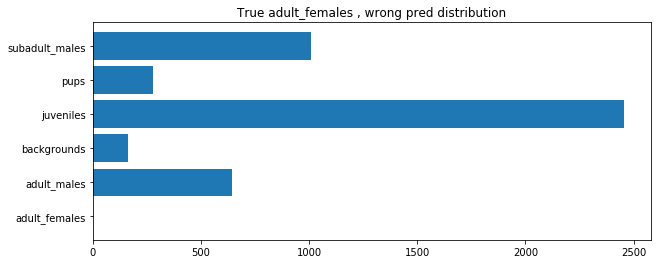

In [245]:
draw_wrong_pred_distribution('adult_females', wrong_preds, class_names)

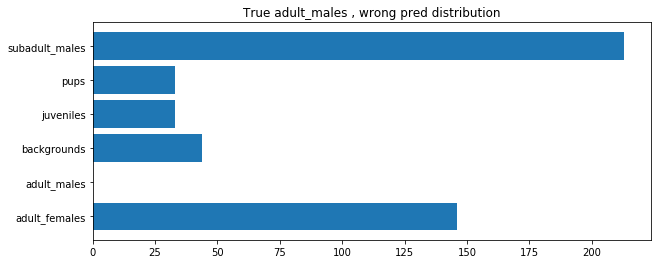

In [240]:
draw_wrong_pred_distribution('adult_males', wrong_preds, class_names)

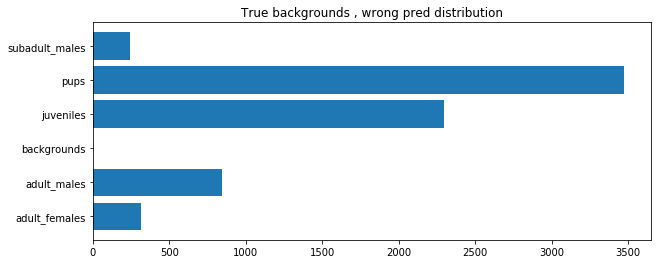

In [243]:
draw_wrong_pred_distribution('backgrounds', wrong_preds, class_names)

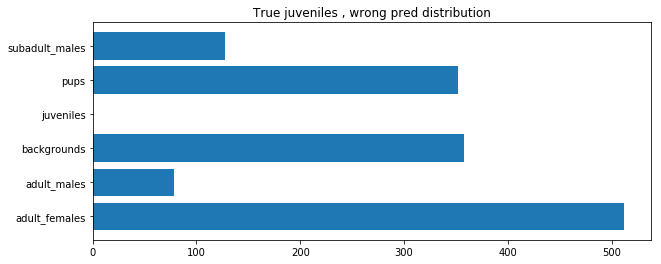

In [244]:
draw_wrong_pred_distribution('juveniles', wrong_preds, class_names)

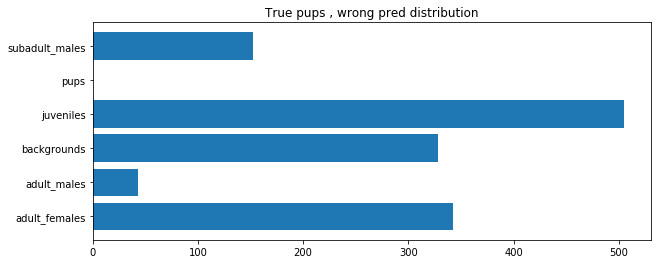

In [241]:
draw_wrong_pred_distribution('pups', wrong_preds, class_names)

In [13]:
def draw_wrong_preds(wrong_preds):
    mask = np.arange(len(wrong_preds))
    idx = np.random.choice(mask)
    plt.figure(figsize=(8,3))
    plt.subplot(1,2,1)
    plt.title("pred:" + class_names[wrong_preds[idx][1].argmax()])
    plt.barh(class_names, wrong_preds[idx][1])
    plt.subplot(1,2,2)
    plt.title("real:" + class_names[wrong_preds[idx][2]])
    plt.imshow(wrong_preds[idx][0])

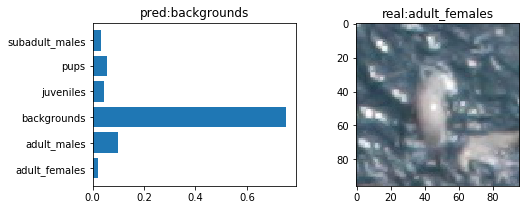

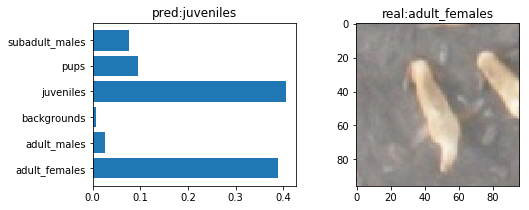

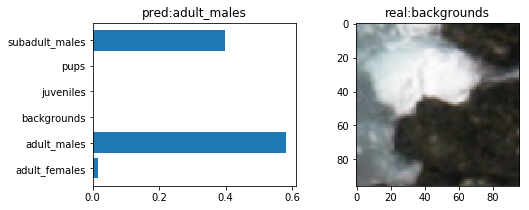

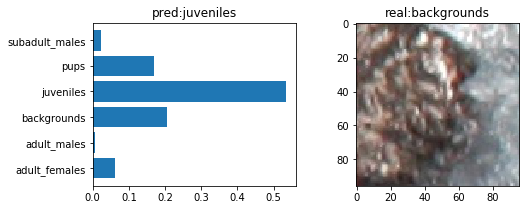

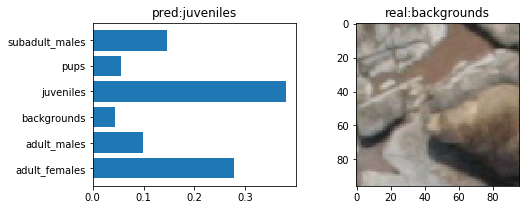

In [212]:
for i in range(5):
    draw_wrong_preds(wrong_preds)

# VGG16 model

In [2]:
wrong_preds = np.load('/Users/YINAN/Documents/Code/Pycharm/Sealion/saved/transfer_vgg16/vgg_score.npy')
print(wrong_preds.shape)

(10111, 3)


In [3]:
class_names = ['adult_females','adult_males','backgrounds','juveniles','pups','subadult_males']

{'adult_males': 392, 'subadult_males': 359, 'adult_females': 3364, 'juveniles': 1706, 'pups': 1127, 'backgrounds': 3163}


Text(0.5,1,'Wrong Predictions')

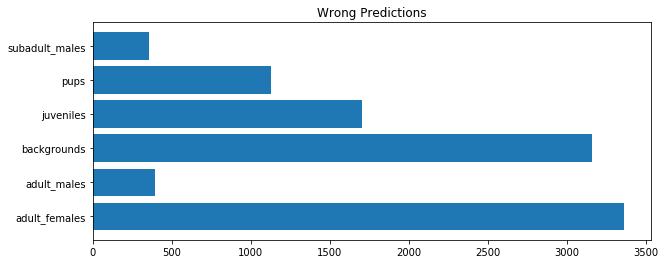

In [4]:
sealion_classes_wrong_num = {
    'adult_males': 0, 
    'subadult_males': 0, 
    'adult_females': 0, 
    'juveniles': 0, 
    'pups': 0, 
    'backgrounds': 0
}
class_names = ['adult_females','adult_males','backgrounds','juveniles','pups','subadult_males']
for i in range(len(wrong_preds)):
    sealion_classes_wrong_num[class_names[wrong_preds[i][-1]]] += 1
print(sealion_classes_wrong_num)

plt.figure(figsize=(10,4))
plt.barh(list(sealion_classes_wrong_num.keys()), list(sealion_classes_wrong_num.values()))
plt.title('Wrong Predictions')

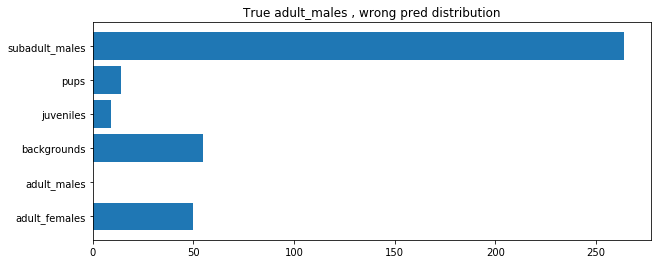

In [8]:
draw_wrong_pred_distribution('adult_males', wrong_preds, class_names)

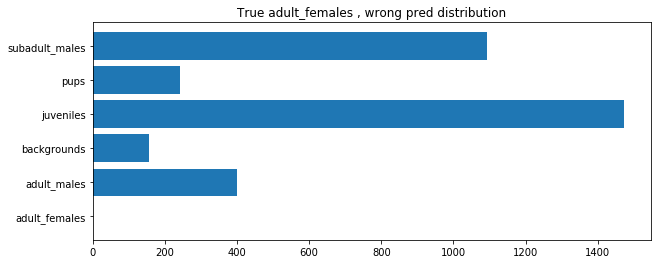

In [7]:
draw_wrong_pred_distribution('adult_females', wrong_preds, class_names)

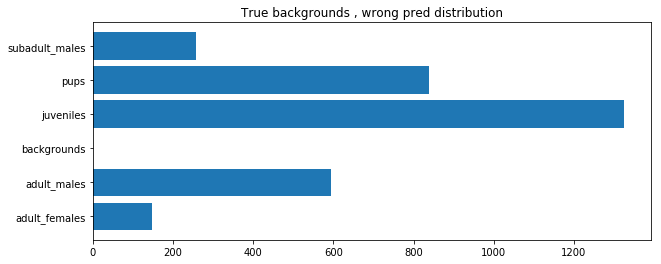

In [9]:
draw_wrong_pred_distribution('backgrounds', wrong_preds, class_names)

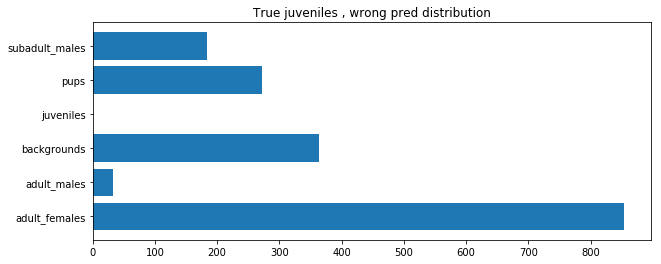

In [10]:
draw_wrong_pred_distribution('juveniles', wrong_preds, class_names)

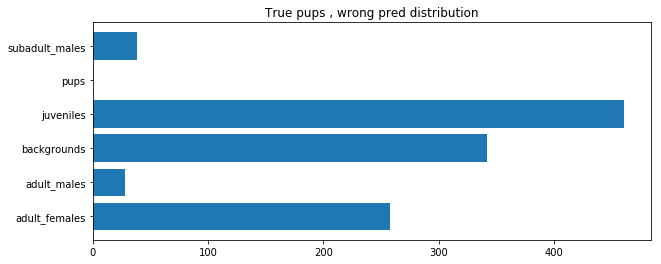

In [11]:
draw_wrong_pred_distribution('pups', wrong_preds, class_names)

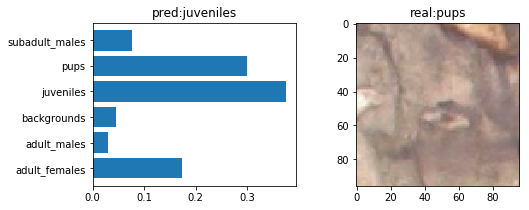

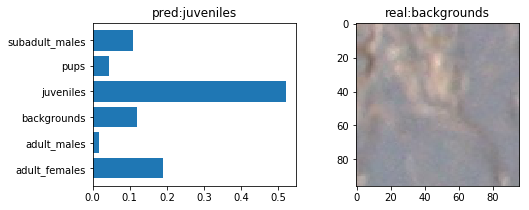

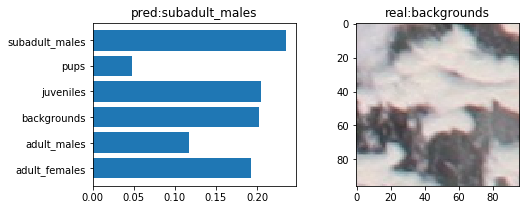

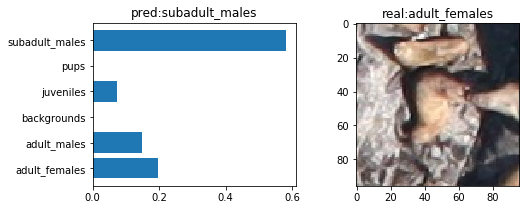

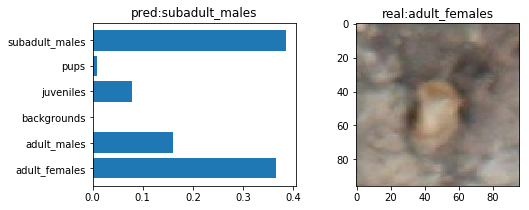

In [14]:
for i in range(5):
    draw_wrong_preds(wrong_preds)